# Density estimation


## Introduction

- Last week we looked a Bayes decision theory
- Nice theoretically, but assumes knolwedge about probablity desnity distribution.
- This is rarely available, so how to we proceed.
- Estimate densities from data!

In this lecture we will cover:
- Mixture modeling
- Non-parametric density estimation
    - K nearest neighbor approach
- K nearest neighbor classifier

---

## Mixture models

- Take a look at the following data:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data samples from three normal distributions
mean1, cov1 = [2, 3], [[1.5, 0.5], [0.5, 1]]  # Mean and covariance for distribution 1
mean2, cov2 = [6, 5], [[1, -0.3], [-0.3, 1.2]]  # Mean and covariance for distribution 2
mean3, cov3 = [4, 1], [[0.8, 0.2], [0.2, 0.5]]  # Mean and covariance for distribution 3

data1 = np.random.multivariate_normal(mean1, cov1, 300)
data2 = np.random.multivariate_normal(mean2, cov2, 300)
data3 = np.random.multivariate_normal(mean3, cov3, 300)

# Combine the data for visualization
data = np.vstack((data1, data2, data3))

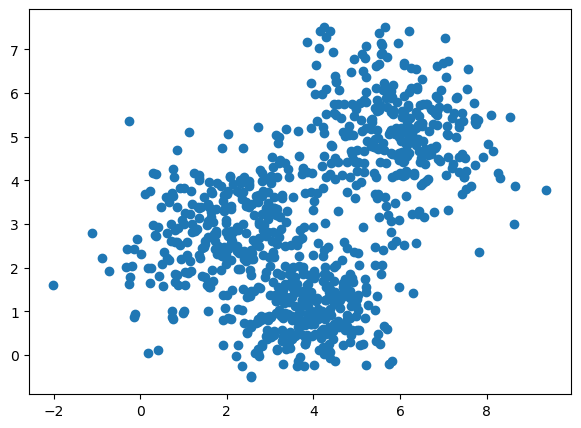

In [6]:
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.show()

### How can we handle this "mix" of distributions?

- Model the unknown density $p(\mathbf{x})$ via a linear combination of density functions:
- $p(\mathbf{x})=\sum_{j=1}^{J}p(\mathbf{x}|j)P_j$
- where
    - $\sum_{j=1}^{J}P_j=1$ and $\int p(\mathbf{x}|j) d\mathbf{x}=1$

### What are the implications of this mix of models?

- Assumes that each sample $\mathbf{x}$ may be "drawn" from any of the $J$ distributions.
- What is the problem here?

### How to perform the modeling?

- First step:
    - Assume a parametric form $p(\mathbf{x}|j;\boldsymbol{\theta})$
- Need to find the unkown parameters $\theta$ and $P_j$ for $j=1,\cdots,J$.
- What would be your first idea?

### How to perform the modeling?

- First idea:
    - Maximize the likelihood function -> $\prod_k p(\mathbf{x}_k|j;\boldsymbol{\theta}, P_1, P_2, \cdots , P_J)$
- Problem:
    - Unknown parameters enter the maximization task in a nonlinear fashion.

## The Expectation Maximisation (EM) - algorithm

- The EM algorithm is one of the most widely used methods for local maximum likelihood estiamte of parameters.
- Ideally suited to handle incomplete data settings.
- Let $\mathbf{y}\in Y \subseteq \mathcal{R}^m$ denote the complete data samples.
    - Probability density function $p_y(\mathbf{y};\boldsymbol{\theta})$, with unkown parameters $\boldsymbol{\theta}$.
- Problem:
    - The $y\text{'s}$. cannot be directly observed.
    - Instead, we observe: $\mathbf{x}=g(\mathbf{y})\in X_{ob} \subseteq \mathcal{R}^l$, where $l<m$.
    - Probablity density function of $\mathbf{x}$ denoted $p_x(\mathbf{x};\boldsymbol{\theta})$

## The Expectation Maximisation (EM) - algorithm

- We have a **many-to-one-mapping**. ->
- Let $Y(\mathbf{x})\subseteq Y$, that is, the subset of all the $y\text{'s}$. corresponding to a specific $\mathbf{x}$.
- Then, the probablity density of the incomplete data is:
    - $\mathbf{x}$ denoted $p_x(\mathbf{x};\boldsymbol{\theta})=\int_{Y(\mathbf{x})}p_y(\mathbf{y};\boldsymbol{\theta})d\mathbf{y}$.


## The Expectation Maximisation (EM) - algorithm

- Maximum likelihood estimate of $\theta$ is found by:
 - $\hat{\theta}_m : \sum_k \frac{\partial \ln(p_y(y_k; \theta))}{\partial \theta} = \mathbf{0}$
- Problem:
    - We do not have the $y\text{'s}$.
- EM-algorithm maximises the expcations of the likelihood function, **conditioned** on the observed samples and the current estimate of $\theta$.
- Consists of two iterative steps:
    - E-step -> expectation step.
    - M-step -> maximization step

###  The E and M step

- **E-step**:
    - Calculate $Q(\theta; \theta^{(t)}) = \mathbb{E}\left\{ \sum_k \ln p_y(y_k; \Theta) | X, \theta^{(t)} \right\}$
- **M-step**:
    - Update $\theta^{(t+1)}$ by maximising $Q(\theta; \theta^{(t)})$
    - i.e. $\theta^{(t+1)} : \frac{\partial Q(\theta; \theta^{(t)})}{\partial \theta} = 0$

###  Practical considerations

- Need a starting point for our unknown parameters.
    - Many smart ways to find this starting point, but still a challenging aspect.
- When do we stop iterating? ->

###  Application to mixture modelling

- Consider a case with complete data.
    - Joint events $(\mathbf{x}_k), j_k$.
- Applying Bayes rule gives:
    - $p_y(\mathbf{x}, j_k;\theta)=p_y(\mathbf{x}| j_k;\theta)P_{jk}$.
- Assuming independence between samples, the log-likeligood is:
    - $L(\theta)=\sum_{k=1}^{N} \ln(p_y(\mathbf{x}| j_k;\theta)P_{jk})$

###  Application to mixture modelling

- Let $\mathbf{P} = \begin{bmatrix} P_1, P_2, \ldots, P_J \end{bmatrix}^T$ and the complete parameters:
$$
\boldsymbol{\Theta} = \begin{bmatrix} \boldsymbol{\theta}^T, \mathbf{P}^T \end{bmatrix}^T
$$

 - Hence the E-step:
$$
Q(\boldsymbol{\Theta}; \boldsymbol{\Theta}^{(t)}) = \mathbb{E} \left\{ \sum_{k=1}^N \ln \left( p(\mathbf{x}_k | j_k; \boldsymbol{\Theta}) P_{j_k} \right) \right\}
$$


###  Application to mixture modelling - the Gaussian case

- Eg., for Gaussian with $\Sigma_j = \sigma_j^2 I$:
- $P_j$, $\mu_j$ and $\sigma_j$ are unknown.

- **E-step:**
$$
p(x_k | j_k; \Theta) = \frac{1}{(2\pi \sigma_j^2)^{1/2}} \exp\left( -\frac{\|x_k - \mu_j\|^2}{2\sigma_j^2} \right)
$$

- Thus,
$$
Q(\Theta, \Theta^{(t)}) = \sum_{k=1}^N \sum_{j=1}^J P(j | x_k, \Theta^{(t)}) \left( -\frac{1}{2} \ln \sigma_j - \frac{1}{2\sigma_j^2} \|x_k - \mu_j\|^2 + \ln P_j \right)
$$

###  Application to mixture modelling - the Gaussian case

- **M-step:**
$$
\mu_j^{(t+1)} = \frac{\sum_{k=1}^N P(j | \mathbf{x}_k; \Theta^{(t)}) \, \mathbf{x}_k}{\sum_{k=1}^N P(j | \mathbf{x}_k; \Theta^{(t)})}
$$

$$
\sigma_j^2 (t+1) = \frac{\sum_{k=1}^N P(j | \mathbf{x}_k; \Theta^{(t)}) \, \|\mathbf{x}_k - \mu_j^{(t+1)}\|^2}{\sum_{k=1}^N P(j | \mathbf{x}_k; \Theta^{(t)})}
$$

###  Application to mixture modelling - the Gaussian case

$$
P_j(t+1) = \frac{1}{N} \sum_{k=1}^N P(j | \mathbf{x}_k, \Theta^{(t)})
$$

Where
$$
P(j | \mathbf{x}_k, \Theta^{(t)}) = \frac{p(\mathbf{x}_k | j; \Theta^{(t)}) P_j(t)}{p(\mathbf{x}_k; \Theta^{(t)})}
$$

and
$$
p(\mathbf{x}_k; \Theta^{(t)}) = \sum_{j=1}^J p(\mathbf{x}_k

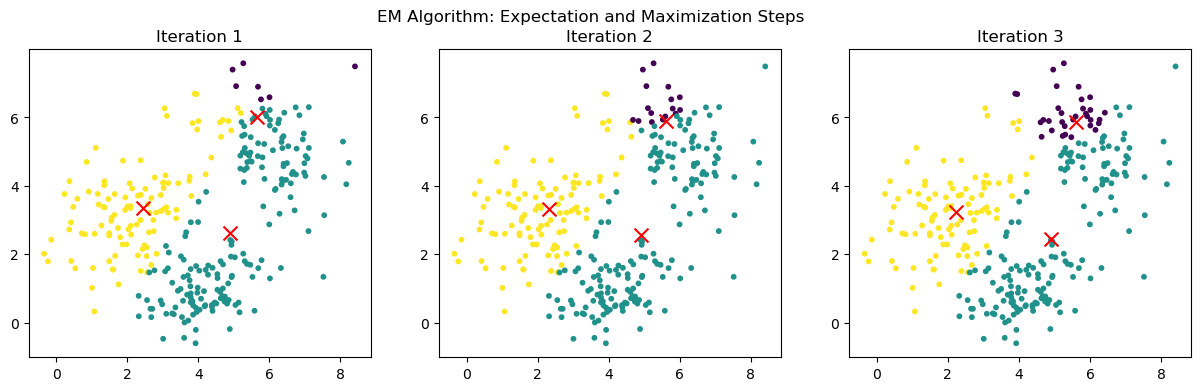

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate synthetic data from three Gaussians
np.random.seed(42)
N = 300
means_true = np.array([[2, 3], [6, 5], [4, 1]])
covs_true = [np.array([[1.5, 0.5], [0.5, 1]]),
             np.array([[1, -0.3], [-0.3, 1.2]]),
             np.array([[0.8, 0.2], [0.2, 0.5]])]
data = np.vstack([
    np.random.multivariate_normal(means_true[i], covs_true[i], N//3)
    for i in range(3)
])

# Initialization
K = 3
N_total = data.shape[0]
np.random.seed(0)
#means = data[np.random.choice(N_total, K, replace=False)]
means = np.random.rand(K, 2) * 10
covs = [np.eye(2) for _ in range(K)]
weights = np.ones(K) / K

def e_step(data, means, covs, weights):
    resp = np.zeros((data.shape[0], K))
    for k in range(K):
        resp[:, k] = weights[k] * multivariate_normal.pdf(data, mean=means[k], cov=covs[k])
    resp /= resp.sum(axis=1, keepdims=True)
    return resp

def m_step(data, resp):
    Nk = resp.sum(axis=0)
    means = np.dot(resp.T, data) / Nk[:, None]
    covs = []
    for k in range(K):
        diff = data - means[k]
        cov = np.dot(resp[:, k] * diff.T, diff) / Nk[k]
        covs.append(cov)
    weights = Nk / data.shape[0]
    return means, covs, weights

# Run EM for 3 iterations and plot
plt.figure(figsize=(15, 4))
for i in range(3):
    resp = e_step(data, means, covs, weights)
    means, covs, weights = m_step(data, resp)
    plt.subplot(1, 3, i+1)
    plt.scatter(data[:, 0], data[:, 1], c=resp.argmax(axis=1), cmap='viridis', s=10)
    for k in range(K):
        plt.scatter(means[k, 0], means[k, 1], c='red', marker='x', s=100)
    plt.title(f'Iteration {i+1}')
plt.suptitle('EM Algorithm: Expectation and Maximization Steps')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.mixture import GaussianMixture

# fetch dataset 
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes) 
X = iris.data.features.iloc[:, :2]
X_1_name = 'sepal length (cm)'
X_2_name = 'sepal width (cm)'
y = np.zeros(150)
y[50:100] = 1
y[100:150] = 2
y_names = iris.data.targets


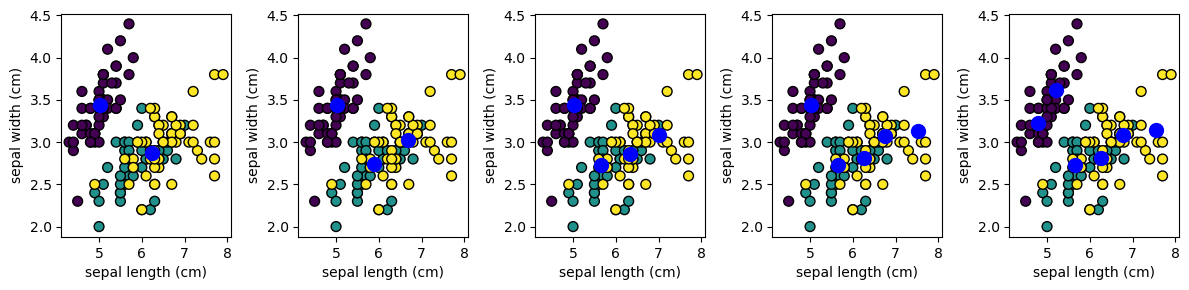

In [9]:
number_of_components = [2,3,4, 5, 6]

plt.figure(1, figsize=(12, 3))
for counter, n_components_i in enumerate(number_of_components):
    gm = GaussianMixture(n_components=n_components_i, random_state=0).fit(X)
    plt.subplot(1, 5, counter+1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=100, color='blue')
    plt.xlabel(X_1_name)
    plt.ylabel(X_2_name)
plt.tight_layout()
plt.show()

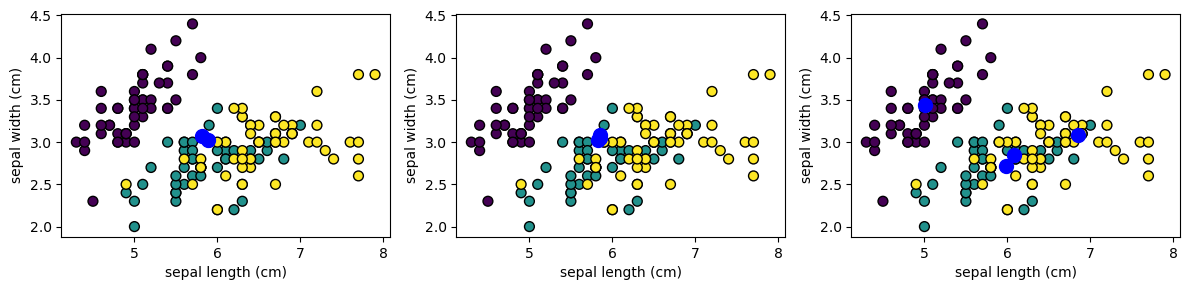

In [10]:
number_of_components = [2, 3, 4]

plt.figure(1, figsize=(12, 3))
for counter, n_components_i in enumerate(number_of_components):
    gm = GaussianMixture(n_components=n_components_i, random_state=1, init_params='random').fit(X)
    plt.subplot(1, 3, counter+1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.scatter(gm.means_[:, 0], gm.means_[:, 1], s=100, color='blue')
    plt.xlabel(X_1_name)
    plt.ylabel(X_2_name)
plt.tight_layout()
plt.show()

## K nearest neighbor density estimation

- Parzen estimation from last lecture:
    - Points are fixed and put "area" around point
- What happens if we reverse the roles?

In [11]:

samples = np.array([
    [1, 1.1], [1.3, 1.2], [0.7, 1.3],  # Spread out within the first cluster
    [4.5, 4.8], [4.8, 5.2],            # Spread out within the second cluster
    [7, 2.5],                          # Separate point moved closer
    [3.5, 6.5],                        # Separate point moved closer
    [8, 8.5]                           # Separate point moved closer
])

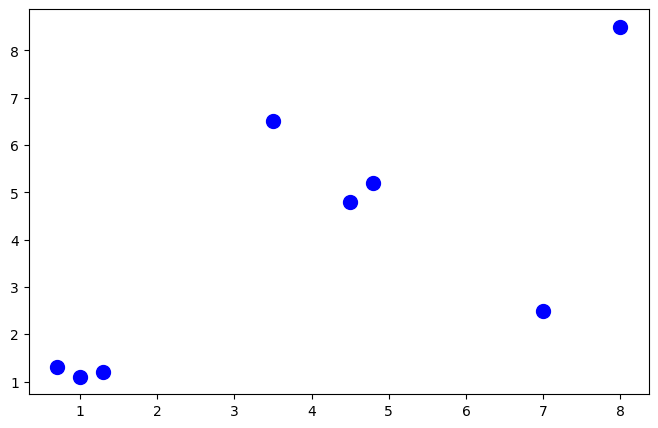

In [12]:
plt.figure(figsize=(8, 5))
plt.scatter(samples[:, 0], samples[:, 1], color='blue', s=100)
plt.show()

## Nearest neighbor classification

- Can create powerful classification algorithms using nearest neighbors.
- Simple idea:
    - Step 1:
    - Step 2:
    - Step 3:
- A bit simplified:
    - What can go wrong above?
    - Limitations?

### Recent advances to address computational burden - Faiss

- Faiss is a library for efficient similarity search.
- [Github repository for Faiss.](https://github.com/facebookresearch/faiss)


### Recent advances to address computational burden - NN-Descent

- FAISS
- [NN-Descent article.](https://www.cs.princeton.edu/cass/papers/www11.pdf)

## Programming exercises

testesq

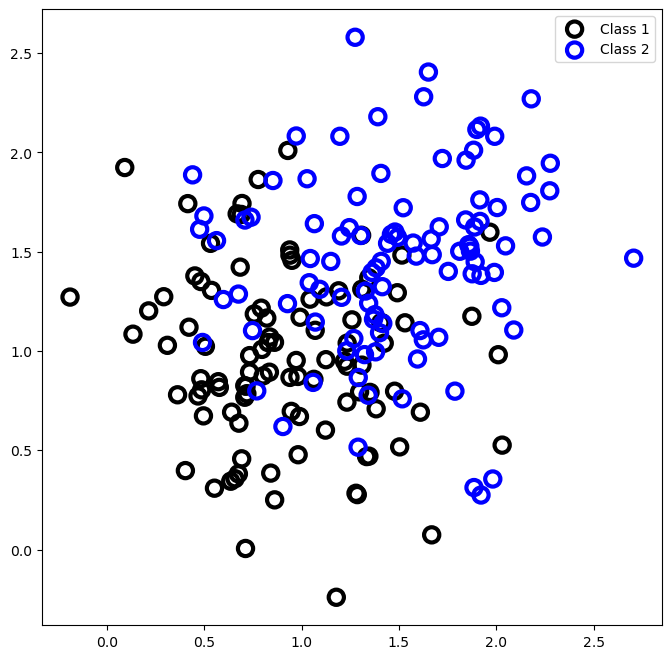

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.legend()
plt.show()

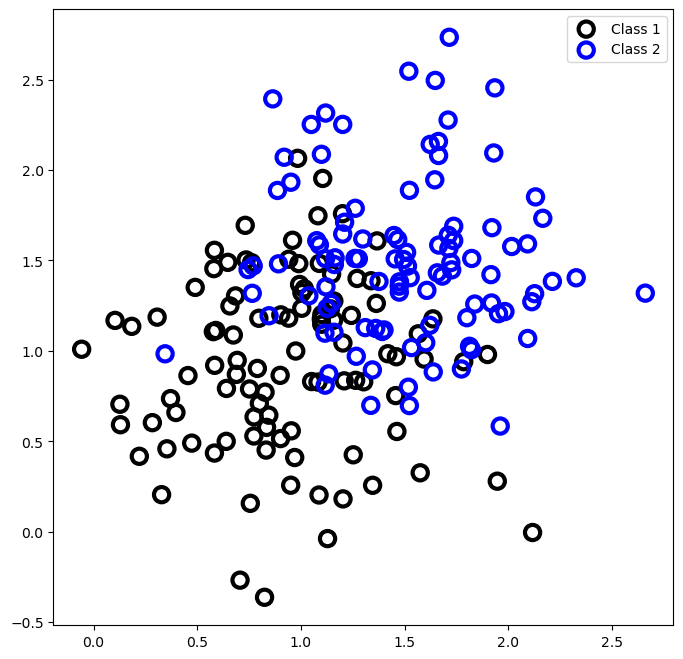

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 100

mu1 = np.array([1, 1])
mu2 = np.array([1.5, 1.5])
sigma = np.array([[0.2, 0.0], [0.0, 0.2]])

x1 = np.random.multivariate_normal(mu1, sigma, N)
x2 = np.random.multivariate_normal(mu2, sigma, N)
x = np.concatenate((x1, x2))
y = np.concatenate((np.ones(N), np.zeros(N)))

plt.figure(1, figsize=(8, 8))
plt.scatter(x1[:, 0], x1[:, 1], s=120, facecolors='none',
            edgecolors='black', linewidth=3.0, label='Class 1')
plt.scatter(x2[:, 0], x2[:, 1], s=120, facecolors='none',
            edgecolors='blue', linewidth=3.0, label='Class 2')
plt.legend()
plt.show()

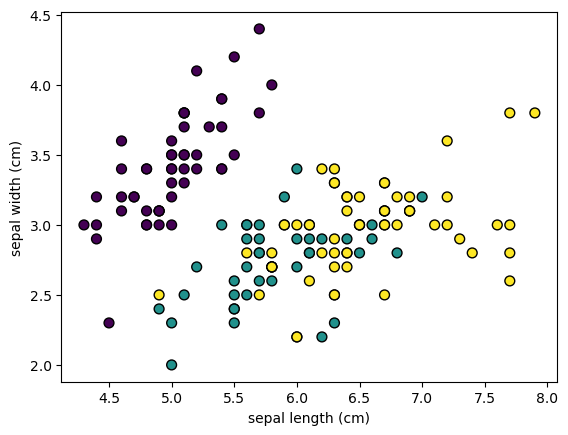

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
X = iris.data.features.iloc[:, :2]
X_1_name = 'sepal length (cm)'
X_2_name = 'sepal width (cm)'
y = np.zeros(150)
y[50:100] = 1
y[100:150] = 2
y_names = iris.data.targets


plt.figure(1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel(X_1_name)
plt.ylabel(X_2_name)
plt.show()


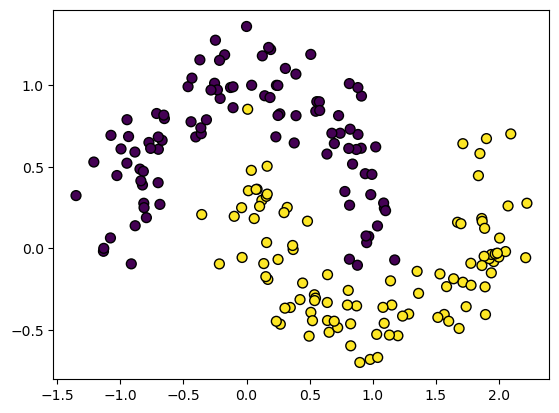

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.show()